implement a Radial Basis Function (RBF) Neural Network for signal prediction in Python

First, we need to import the necessary libraries:

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Next, we define the RBF function, which takes in the input data X and the center points C of the RBFs:

In [3]:
def RBF(X, C, s):
    return np.exp(-cdist(X, C)**2 / (2 * s**2))


Here, s is the width parameter, which determines how "wide" each RBF is.

Now, we define our RBF Neural Network class:

In [4]:
class RBFNet():
    def __init__(self, k, s=1.0):
        self.k = k
        self.s = s
    
    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.k).fit(X)
        self.centers = kmeans.cluster_centers_
        self.W = np.random.randn(self.k)
        
        # Compute RBF values for each input
        Phi = RBF(X, self.centers, self.s)
        
        # Solve for output weights
        self.W = np.linalg.pinv(Phi) @ y
    
    def predict(self, X):
        # Compute RBF values for each input
        Phi = RBF(X, self.centers, self.s)
        
        # Predict output using RBF values and output weights
        y_pred = Phi @ self.W
        return y_pred

In the fit method, we first use k-means clustering to find k centers for our RBFs. We then compute the RBF values for each input using the RBF function, and solve for the output weights using the pseudo-inverse of the RBF values and the target outputs y.

In the predict method, we simply compute the RBF values for each input and use the output weights to make predictions.

Here's an example usage of the RBFNet class:

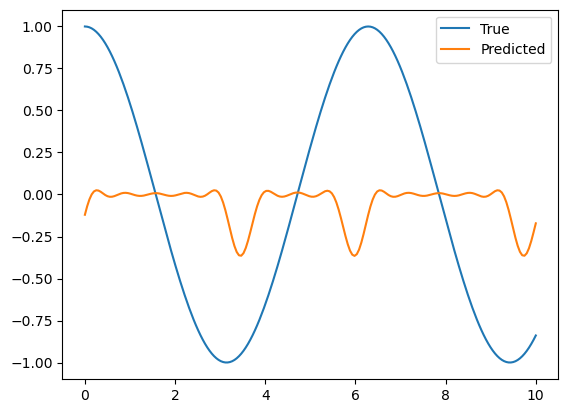

In [12]:
import matplotlib.pyplot as plt

# Generate some example data
t = np.linspace(0, 10, 200)
X = np.sin(t)[:, None]
y = np.cos(t)

# Create and train RBFNet
rbfnet = RBFNet(k=10, s=1.0)
rbfnet.fit(X, y)

# Make predictions
y_pred = rbfnet.predict(X)

# Plot results
plt.plot(t, y, label='True')
plt.plot(t, y_pred, label='Predicted')
plt.legend()
plt.show()

This example generates some sine wave data, creates an RBFNet with k=10 RBFs, trains it on the data, and makes predictions. The results are then plotted using matplotlib.

Note that this is just one possible implementation of an RBF Neural Network in Python, and there are many variations and optimizations that can be made depending on the specific use case.

\textbf{Underground Water Level Prediction}

In [20]:
class RBFNet():
    def __init__(self, k, s=1.0):
        self.k = k
        self.s = s
    
    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.k).fit(X)
        self.centers = kmeans.cluster_centers_
        self.W = np.random.randn(self.k)
        
        # Compute RBF values for each input
        Phi = RBF(X, self.centers, self.s)
        
        # Solve for output weights
        self.W = np.linalg.pinv(Phi) @ y
        
        # Compute cluster standard deviations
        dists = cdist(X, self.centers)
        self.sigma = np.mean(np.min(dists, axis=1))
    
    def predict(self, X):
        # Compute RBF values for each input
        Phi = RBF(X, self.centers, self.s)
        
        # Predict output using RBF values and output weights
        y_pred = Phi @ self.W
        return y_pred


In [22]:
rbfnet = RBFNet(k=10, s=1.0)
rbfnet.fit(X, y)

centers = rbfnet.centers
sigma = rbfnet.sigma

In [24]:
print(centers)

[[ 0.81393353]
 [-0.94049599]
 [ 0.00974364]
 [ 0.4249668 ]
 [-0.45770599]
 [ 0.96245538]
 [-0.70803321]
 [ 0.6359665 ]
 [ 0.21203397]
 [-0.22296241]]


In [25]:
print(sigma)

0.04689338113639286
